In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='AppleGothic')
print(plt.figure().dpi)

100.0


<Figure size 640x480 with 0 Axes>

In [3]:
exercise_df = pd.read_csv("../data/raw/exercise.csv")

In [4]:
exercise_df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [5]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  90 non-null     int64 
 1   id          90 non-null     int64 
 2   diet        90 non-null     object
 3   pulse       90 non-null     int64 
 4   time        90 non-null     object
 5   kind        90 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


In [6]:
exercise_df.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [7]:
exercise_df.describe(include='object')

,diet,time,kind
count,90,90,90
unique,2,3,3
top,low fat,1 min,rest
freq,45,30,30


In [8]:
sum(exercise_df.duplicated())

0

In [9]:
exercise_df.isna().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

In [10]:
exercise_df = exercise_df.drop(columns='Unnamed: 0')

In [11]:
exercise_df.to_csv('../data/processed/clean_exercise.csv', index=False)

In [12]:
pulse_mean = exercise_df['pulse'].mean()
pulse_median = exercise_df['pulse'].median()
pulse_std = exercise_df['pulse'].std()

print(pulse_mean)
print(pulse_median)
print(pulse_std)

99.7
96.0
14.858470893849434


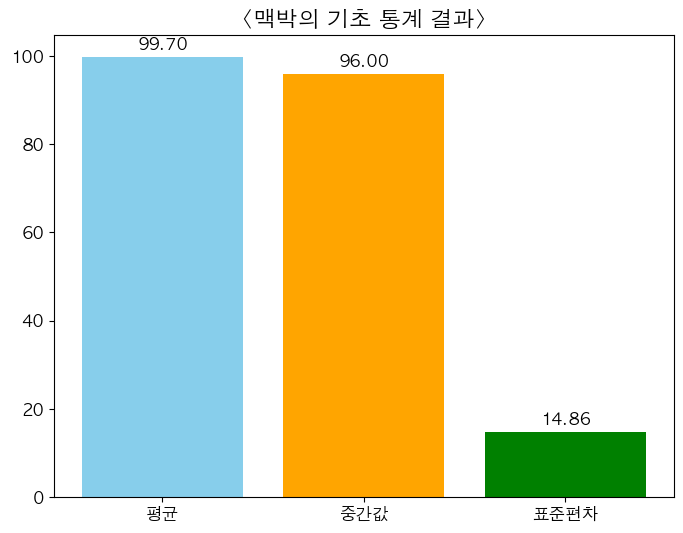

In [13]:
stats = {
    '평균': pulse_mean,
    '중간값': pulse_median,
    '표준편차': pulse_std
}

labels = list(stats.keys())
values = list(stats.values())

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'green'])

for bar, value in zip(bars, values):
    plt.annotate(
        f'{value:.2f}',                      
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        xytext=(0, 5),                          
        textcoords="offset points",             
        ha='center', fontsize=12, fontweight='bold', color='black' 
    )
plt.title('<맥박의 기초 통계 결과>', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 저장
plt.savefig("../results/visualizations/individual_sample_results/basic_statistics_of_pulse")
plt.show()

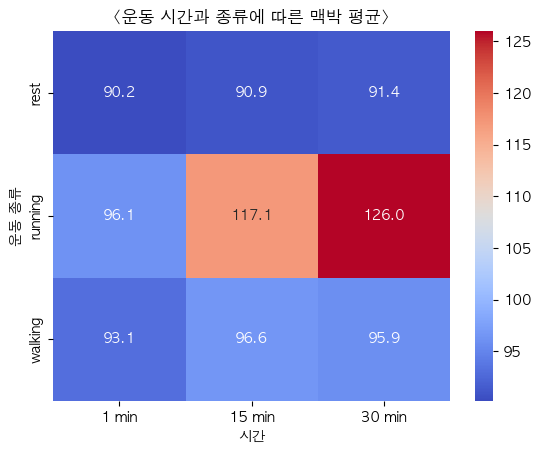

In [14]:
pv_table_1 = exercise_df.pivot_table(index='kind', columns='time', values='pulse')

sns.heatmap(data=pv_table_1, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('<운동 시간과 종류에 따른 맥박 평균>')
plt.xlabel('시간')
plt.ylabel('운동 종류')

plt.savefig("../results/visualizations/individual_sample_results/pulse_mean_by_kind_and_time")
plt.show()

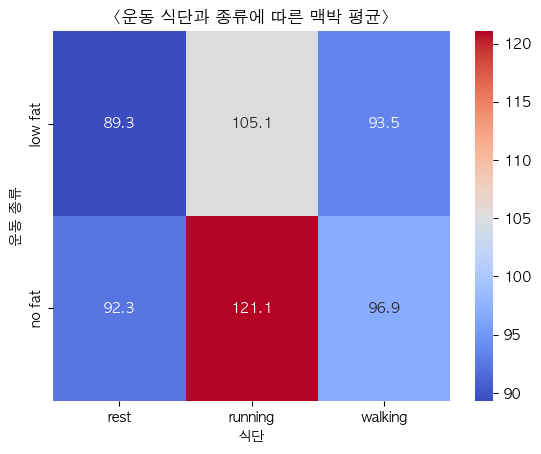

In [15]:
pv_table_2 = exercise_df.pivot_table(index='diet', columns='kind', values='pulse')


sns.heatmap(data=pv_table_2, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('<운동 식단과 종류에 따른 맥박 평균>')
plt.xlabel('식단')
plt.ylabel('운동 종류')

plt.savefig("../results/visualizations/individual_sample_results/pulse_mean_by_kind_and_diet")
plt.show()

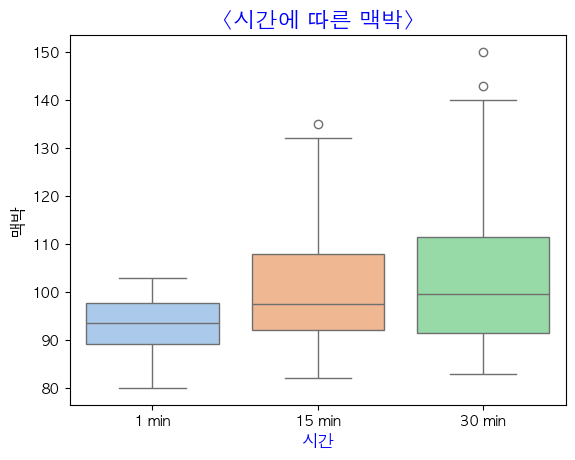

In [16]:
sns.boxplot(data=exercise_df, x='time', y='pulse', hue='time', palette='pastel')
plt.title('<시간에 따른 맥박>', fontsize=16, fontweight='bold', color='blue')
plt.xlabel('시간', fontsize=12, color='blue')
plt.ylabel('맥박', fontsize=12)

plt.savefig("../results/visualizations/individual_sample_results/pulse_by_time")
plt.show()

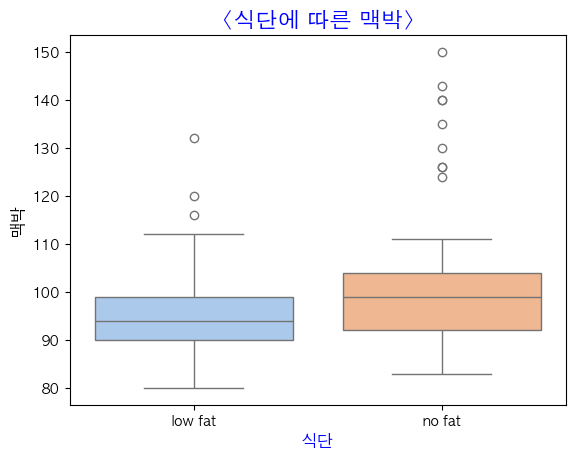

In [17]:
sns.boxplot(data=exercise_df, x='diet', y='pulse', hue='diet', palette='pastel')
plt.title('<식단에 따른 맥박>', fontsize=16, fontweight='bold', color='blue')
plt.xlabel('식단', fontsize=12, color='blue')
plt.ylabel('맥박', fontsize=12)

plt.savefig("../results/visualizations/individual_sample_results/pulse_by_diet")
plt.show()

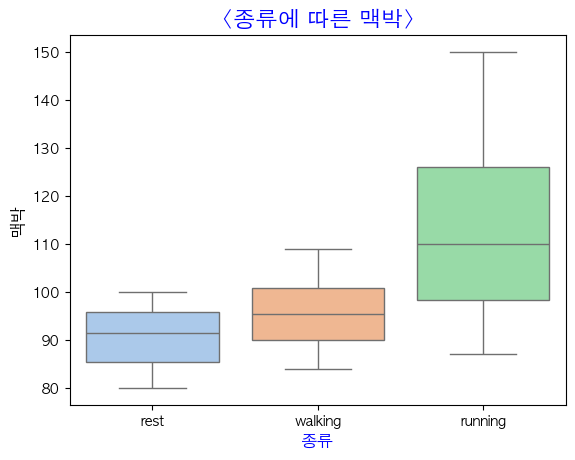

In [18]:
sns.boxplot(data=exercise_df, x='kind', y='pulse', hue='kind', palette='pastel')
plt.title('<종류에 따른 맥박>', fontsize=16, fontweight='bold', color='blue')
plt.xlabel('종류', fontsize=12, color='blue')
plt.ylabel('맥박', fontsize=12)

plt.savefig("../results/visualizations/individual_sample_results/pulse_by_kind")
plt.show()

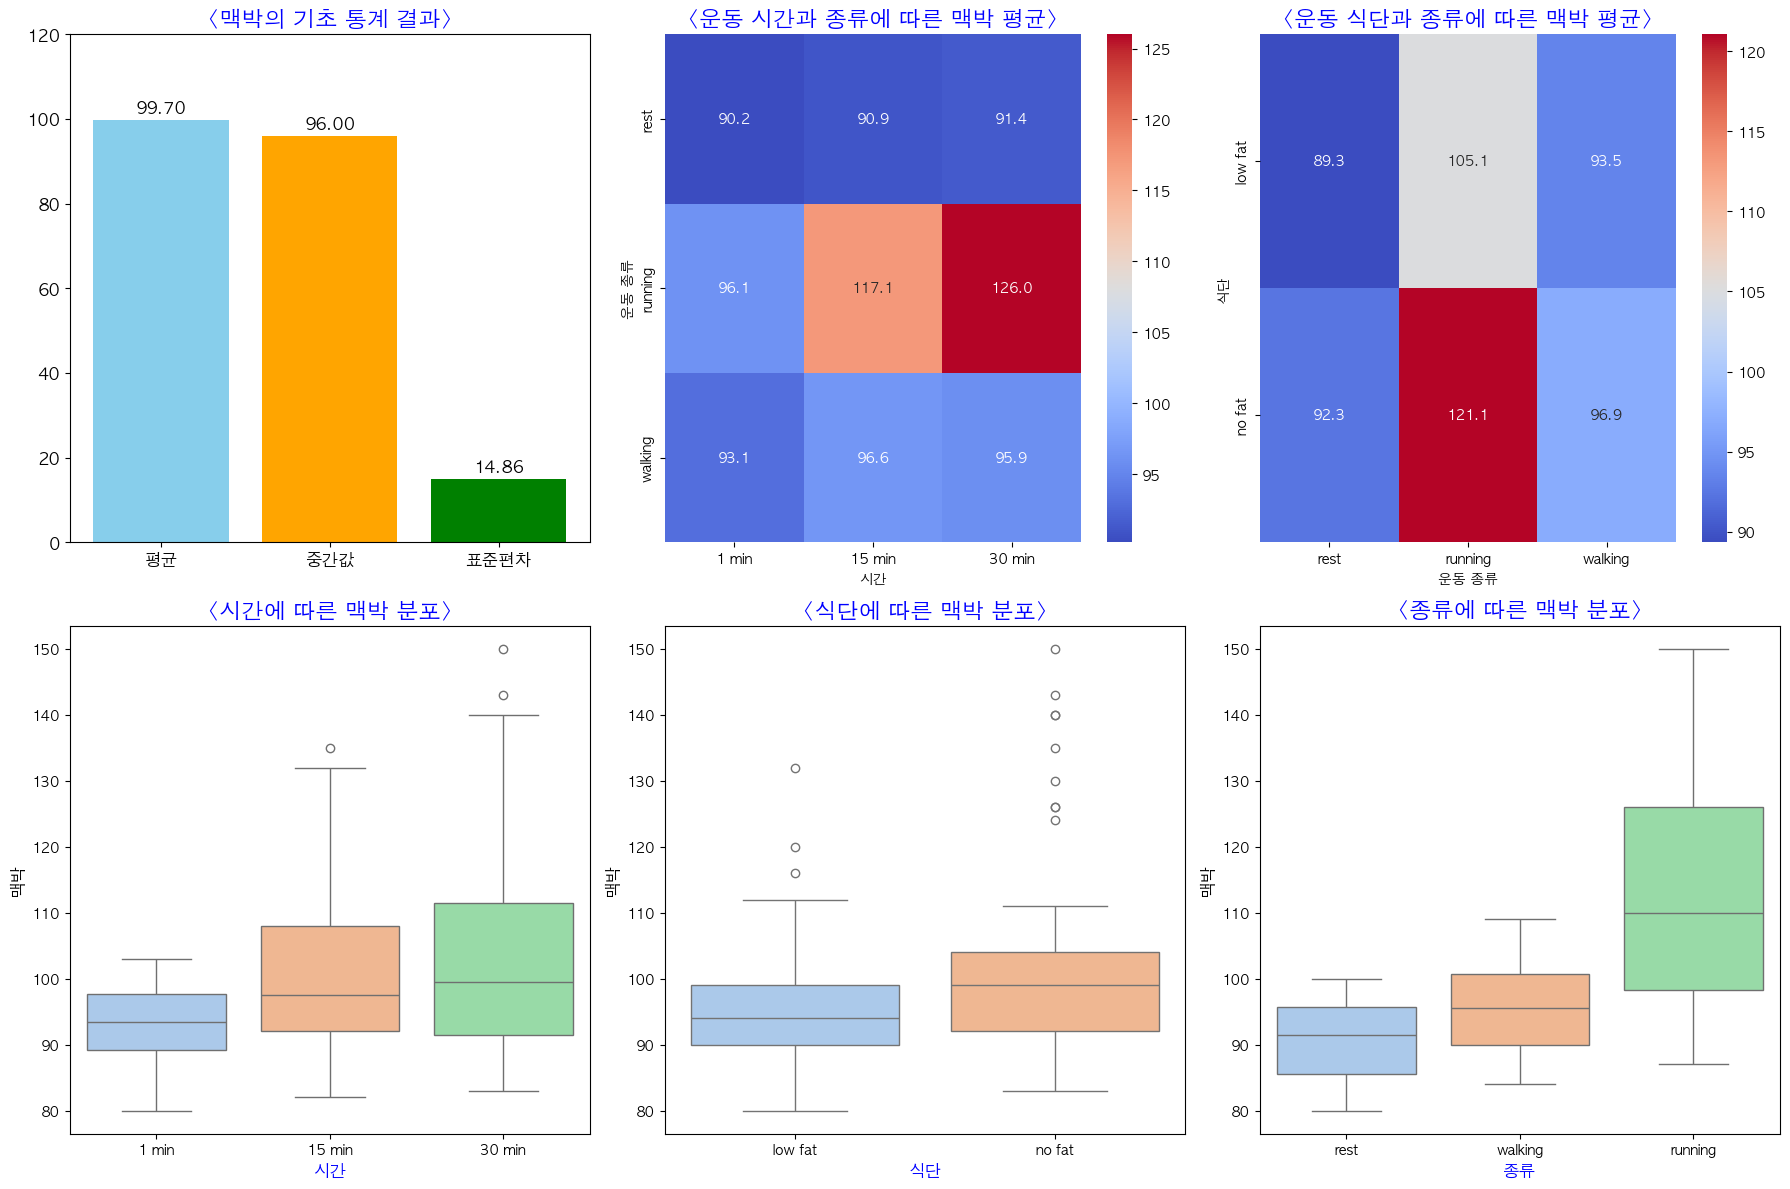

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 맥박의 기초 통계
bars = axes[0, 0].bar(labels, values, color=['skyblue', 'orange', 'green'])

for bar, value in zip(bars, values):
    axes[0, 0].annotate(
        f'{value:.2f}',                      
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        xytext=(0, 5),                          
        textcoords="offset points",             
        ha='center', fontsize=12, fontweight='bold', color='black' 
    )
axes[0, 0].set_title('<맥박의 기초 통계 결과>', fontsize=16, fontweight='bold', color='blue')

xticks = range(len(labels))                                                     # X축 눈금 위치 (인덱스 기반)
axes[0, 0].set_xticks(xticks)                                                   # X축 눈금 위치 설정
axes[0, 0].set_xticklabels(labels, fontsize=12)                                 # X축 눈금 레이블 설정


yticks = axes[0, 0].get_yticks()                                                # 현재 Y축 눈금 값 가져오기
axes[0, 0].set_yticks(yticks)                                                   # Y축 눈금 고정
axes[0, 0].set_yticklabels([f'{int(tick)}' for tick in yticks], fontsize=12)    # Y축 레이블 설정

# 운동 시간과 종류에 따른 맥박 평균
sns.heatmap(data=pv_table_1, annot=True, cmap='coolwarm', fmt='.1f', ax=axes[0, 1])
axes[0, 1].set_title('<운동 시간과 종류에 따른 맥박 평균>', fontsize=16, fontweight='bold', color='blue')
axes[0, 1].set_xlabel('시간')
axes[0, 1].set_ylabel('운동 종류')

# 운동 식단과 종류에 따른 맥박 평균
sns.heatmap(data=pv_table_2, annot=True, cmap='coolwarm', fmt='.1f', ax=axes[0, 2])
axes[0, 2].set_title('<운동 식단과 종류에 따른 맥박 평균>', fontsize=16, fontweight='bold', color='blue')
axes[0, 2].set_xlabel('운동 종류')
axes[0, 2].set_ylabel('식단')

# 시간에 따른 맥박
sns.boxplot(data=exercise_df, x='time', y='pulse', hue='time', palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('<시간에 따른 맥박 분포>', fontsize=16, fontweight='bold', color='blue')
axes[1, 0].set_xlabel('시간', fontsize=12, color='blue')
axes[1, 0].set_ylabel('맥박', fontsize=12)

# 식단에 따른 맥박
sns.boxplot(data=exercise_df, x='diet', y='pulse', hue='diet', palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('<식단에 따른 맥박 분포>', fontsize=16, fontweight='bold', color='blue')
axes[1, 1].set_xlabel('식단', fontsize=12, color='blue')
axes[1, 1].set_ylabel('맥박', fontsize=12)

# 종류에 따른 맥박
sns.boxplot(data=exercise_df, x='kind', y='pulse', hue='kind', palette='pastel', ax=axes[1, 2])
axes[1, 2].set_title('<종류에 따른 맥박 분포>', fontsize=16, fontweight='bold', color='blue')
axes[1, 2].set_xlabel('종류', fontsize=12, color='blue')
axes[1, 2].set_ylabel('맥박', fontsize=12)


plt.savefig('../results/visualizations/overall_result/result.png')
plt.tight_layout()
plt.show()